BONUS Question 1(f): Modify your code in Problem 1, when you can trade only integer share quantities (real-world scenario) and recalculate the metrics in parts (a) and (b)

In [331]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt 

In [332]:
ndata=yf.download('RELIANCE.NS',start='2023-04-01',end='2024-03-31')

[*********************100%%**********************]  1 of 1 completed

In [333]:
ndata.to_csv('bonus.csv')

In [334]:
bonus=pd.read_csv('bonus.csv')

In [335]:
initial_capital=int(100000)

In [336]:
bonus

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-03,2164.434326,2168.126221,2136.744141,2151.927490,2144.352783,5146521
1,2023-04-05,2167.203125,2167.203125,2130.791016,2146.758789,2139.202148,8131464
2,2023-04-06,2139.651611,2172.741211,2139.651611,2161.157471,2153.550049,9217523
3,2023-04-10,2169.049316,2169.418457,2142.789795,2145.835693,2138.282227,6480704
4,2023-04-11,2154.281250,2160.742188,2145.097412,2156.450195,2148.859375,5271183
...,...,...,...,...,...,...,...
238,2024-03-21,2905.050049,2915.800049,2889.350098,2901.949951,2901.949951,6503468
239,2024-03-22,2899.949951,2920.000000,2894.699951,2910.050049,2910.050049,9763804
240,2024-03-26,2890.000000,2904.800049,2878.000000,2883.149902,2883.149902,5707953
241,2024-03-27,2896.000000,3000.000000,2894.000000,2985.699951,2985.699951,8163322


To calculate new capital after everyday trade considering that stock can be brought in integer multiple only

In [337]:
new_cap=[]
stocks_purchased=0
new_capital=initial_capital
for i in range(243):
    stocks_purchased=initial_capital//bonus['Open'].iloc[i]
    new_capital-=stocks_purchased*bonus['Open'].iloc[i]
    new_capital+=stocks_purchased*bonus['Close'].iloc[i]
    new_cap.append(new_capital)
    initial_capital=new_capital
    # print(stocks_purchased)
final_capital=initial_capital

In [338]:
New_Capital=pd.DataFrame(new_cap)

In [339]:
bonus['New_Capital']=New_Capital

#
Calculating final capital

In [340]:
final_capital  #Part(1) answer

100171.31420898438

In [341]:
bonus['Daily_Returns']=(bonus['Close']-bonus['Open'])/bonus['Open']*100

In [342]:
bonus

,Date,Open,High,Low,Close,Adj Close,Volume,New_Capital,Daily_Returns
0,2023-04-03,2164.434326,2168.126221,2136.744141,2151.927490,2144.352783,5146521,99424.685547,-0.577834
1,2023-04-05,2167.203125,2167.203125,2130.791016,2146.758789,2139.202148,8131464,98504.690430,-0.943351
2,2023-04-06,2139.651611,2172.741211,2139.651611,2161.157471,2153.550049,9217523,99493.959961,1.005110
3,2023-04-10,2169.049316,2169.418457,2142.789795,2145.835693,2138.282227,6480704,98449.346924,-1.070221
4,2023-04-11,2154.281250,2160.742188,2145.097412,2156.450195,2148.859375,5271183,98546.949463,0.100681
...,...,...,...,...,...,...,...,...,...
238,2024-03-21,2905.050049,2915.800049,2889.350098,2901.949951,2901.949951,6503468,97567.617432,-0.106714
239,2024-03-22,2899.949951,2920.000000,2894.699951,2910.050049,2910.050049,9763804,97900.920654,0.348285
240,2024-03-26,2890.000000,2904.800049,2878.000000,2883.149902,2883.149902,5707953,97674.867432,-0.237028
241,2024-03-27,2896.000000,3000.000000,2894.000000,2985.699951,2985.699951,8163322,100634.965820,3.097374


In [343]:
risk_free_rate=0.05


Function for Sharpe_Ratio

In [344]:
def Sharpe_calculate(daily,risk_free_rate,days=243):
    excess=np.mean(daily)-risk_free_rate
    standard_deviation=np.std(daily)
    sharpe_ratio=(np.sqrt(days)*excess)/standard_deviation
    return sharpe_ratio

Value of Sharpe Ratio

In [345]:
Sharpe_calculate(bonus['Daily_Returns'],risk_free_rate)


-0.6141728390234215

Function to calculate Maximum drawdown

In [346]:
def max_drawdown(data):
    high=data[0]
    maximum_drawdown=0.0
    for i in range(1,len(data)):
        if data[i]>high:
            high=data[i]
        else:
            drawdown = (high-data[i])/high
            if drawdown>maximum_drawdown:
                maximum_drawdown=drawdown

    return maximum_drawdown*100



In [347]:
maximum_drawdown=max_drawdown(bonus['Close'])

Maximum Drawdown(in %)

In [348]:
maximum_drawdown

15.117140238518223

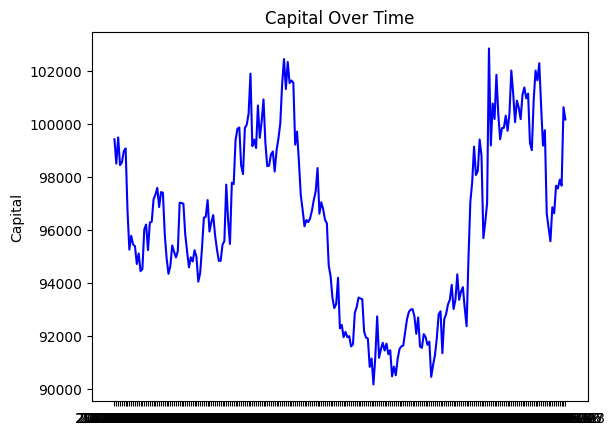

In [349]:
plt.plot(bonus['Date'],bonus['New_Capital'], label="RELIANCE", color='blue')
plt.ylabel('Capital')
plt.title('Capital Over Time')
plt.show()

In [350]:
bonus

,Date,Open,High,Low,Close,Adj Close,Volume,New_Capital,Daily_Returns
0,2023-04-03,2164.434326,2168.126221,2136.744141,2151.927490,2144.352783,5146521,99424.685547,-0.577834
1,2023-04-05,2167.203125,2167.203125,2130.791016,2146.758789,2139.202148,8131464,98504.690430,-0.943351
2,2023-04-06,2139.651611,2172.741211,2139.651611,2161.157471,2153.550049,9217523,99493.959961,1.005110
3,2023-04-10,2169.049316,2169.418457,2142.789795,2145.835693,2138.282227,6480704,98449.346924,-1.070221
4,2023-04-11,2154.281250,2160.742188,2145.097412,2156.450195,2148.859375,5271183,98546.949463,0.100681
...,...,...,...,...,...,...,...,...,...
238,2024-03-21,2905.050049,2915.800049,2889.350098,2901.949951,2901.949951,6503468,97567.617432,-0.106714
239,2024-03-22,2899.949951,2920.000000,2894.699951,2910.050049,2910.050049,9763804,97900.920654,0.348285
240,2024-03-26,2890.000000,2904.800049,2878.000000,2883.149902,2883.149902,5707953,97674.867432,-0.237028
241,2024-03-27,2896.000000,3000.000000,2894.000000,2985.699951,2985.699951,8163322,100634.965820,3.097374
